In [536]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import LSTM
from tensorflow.keras import backend as K
# from google.colab import files
# from google.colab import drive
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

In [537]:
# Create a sequential neural network model
dnn_model=tf.keras.models.Sequential([
    # tf.keras.layers.Conv1D(filters=512, kernel_size=3,
    #                        strides=1, padding="causal",
    #                        activation="relu",
    #                        input_shape=[3,1]),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, activation='relu', return_sequences=True), input_shape=(3,1)),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, activation='relu')),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(500),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(400),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Activation('relu'),
    # #tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Activation('relu'),
    # tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(4, activation="linear")
])

In [538]:
#costom loss function
def rmse(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred-y_true)))

def lms(y_true,y_pred):
  return (K.square(y_pred-y_true))/2


In [539]:
# Compile the model with least mean square loss and Adam optimizer
dnn_model.compile(loss=lms, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)) #metrics=['mse'])

In [540]:
df = pd.read_csv('J1_Atas Bawah.csv')
df.dropna(inplace=True)

df = df.sample(frac = 1)

X = df[['x', 'y', 'z', 'roll', 'pitch', 'yaw']]
y = df[['theta1', 'theta2', 'theta3', 'theta4']]

train_size = int(0.80 * len(df))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [541]:
class myCallback(Callback):    
    def on_epoch_end(self, epoch, logs={}):
        print("Checking loss at end of epoch...")
        if logs['val_loss'] <= 0.00001:
               self.model.stop_training = True
        else:
          print ('not yet...')

In [542]:
# Train the model on the dataset
# epochs = 200
# batch_size = 20
# dnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, verbose=1, batch_size=batch_size)
loss_callback_obj = myCallback()
dnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10000, batch_size=200, verbose=1, callbacks=[loss_callback_obj])

Epoch 1/10000
1/7 [===>..........................] - ETA: 7s - loss: 0.2764Checking loss at end of epoch...
not yet...
7/7 [==============================] - 1s 37ms/step - loss: 0.1996 - val_loss: 0.1507
Epoch 2/10000
1/7 [===>..........................] - ETA: 0s - loss: 0.1487Checking loss at end of epoch...
not yet...
7/7 [==============================] - 0s 12ms/step - loss: 0.1290 - val_loss: 0.1142
Epoch 3/10000
1/7 [===>..........................] - ETA: 0s - loss: 0.1091Checking loss at end of epoch...
not yet...
7/7 [==============================] - 0s 12ms/step - loss: 0.1058 - val_loss: 0.1048
Epoch 4/10000
1/7 [===>..........................] - ETA: 0s - loss: 0.0950Checking loss at end of epoch...
not yet...
7/7 [==============================] - 0s 12ms/step - loss: 0.0976 - val_loss: 0.0961
Epoch 5/10000
1/7 [===>..........................] - ETA: 0s - loss: 0.0920Checking loss at end of epoch...
not yet...
7/7 [==============================] - 0s 12ms/step - loss: 0

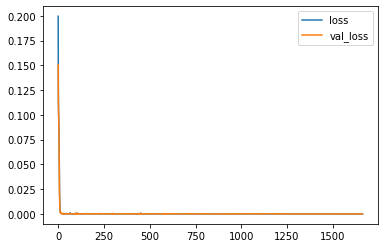

In [543]:
history_df =pd.DataFrame(dnn_model.history.history)
loss_plot = history_df[['loss', 'val_loss']].plot()
fig = loss_plot.get_figure()
fig.savefig('E:/ACA/File ITS/Jurusan/Kuliah Akademik/kuliah semester 8/Tugas Akhir/Dokumentasi/Grafik/Grafik Error PO/e1_h5_n50_n500_n400_n100_n20 (e0.00001).png')

In [544]:
X_target = X_test.iloc[0:].values
Y_target = y_test.iloc[0:].values

Y_prediksi = dnn_model.predict(X_target)

10/10 [==============================] - 0s 2ms/step


In [545]:
asd = np.concatenate([X_target, Y_target, Y_prediksi], axis=1)
column_labels = ['x','y','z','roll','pitch','yaw','theta1','theta2','theta3','theta4','theta1_Pred','theta2_pred','theta3_pred','theta4_pred']
df = pd.DataFrame(asd, columns=column_labels)
df

,x,y,z,roll,pitch,yaw,theta1,theta2,theta3,theta4,theta1_Pred,theta2_pred,theta3_pred,theta4_pred
0,0.157,0.145,0.379,0.000,0.833,0.785,0.785,0.034,-0.764,-0.103,0.784650,0.034279,-0.764320,-0.103031
1,0.182,-0.170,0.090,3.141,2.873,2.357,-0.785,0.517,0.766,-1.552,-0.786446,0.517224,0.770024,-1.554165
2,0.186,0.100,0.384,0.001,0.842,0.523,0.523,0.026,-0.789,-0.079,0.521765,0.025022,-0.789455,-0.076766
3,0.133,0.209,0.091,0.001,0.272,1.046,1.047,0.515,0.758,-1.545,1.039025,0.514406,0.761824,-1.546963
4,0.108,0.166,0.391,0.002,0.861,1.046,1.047,0.010,-0.840,-0.031,1.042409,0.011683,-0.837120,-0.032568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,0.252,0.000,0.090,0.000,0.267,0.000,0.000,0.519,0.773,-1.558,-0.002677,0.517368,0.772912,-1.557359
304,0.144,-0.228,0.303,3.142,2.456,2.095,-1.047,0.162,-0.361,-0.485,-1.046210,0.160878,-0.359676,-0.485225
305,0.012,-0.285,0.218,3.141,2.603,1.572,-1.570,0.286,0.017,-0.844,-1.570890,0.285653,0.031178,-0.858112
306,0.173,-0.093,0.395,3.142,2.270,2.620,-0.523,0.001,-0.869,-0.004,-0.527931,0.001120,-0.867431,-0.005583


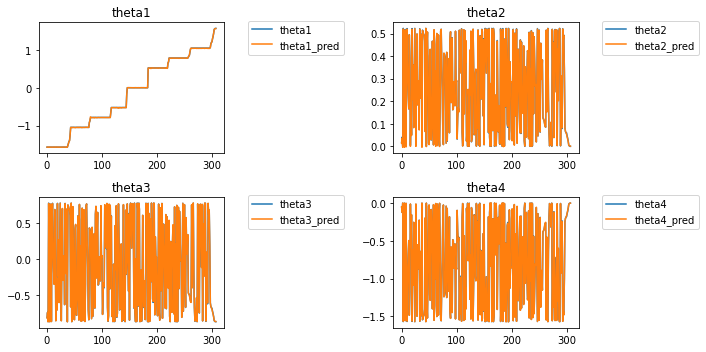

In [546]:
dataf = pd.DataFrame({'theta1':Y_target[:,0], 'theta1_pred':Y_prediksi[:,0],
                  'theta2':Y_target[:,1], 'theta2_pred':Y_prediksi[:,1],
                  'theta3':Y_target[:,2], 'theta3_pred':Y_prediksi[:,2],
                  'theta4':Y_target[:,3], 'theta4_pred':Y_prediksi[:,3]}).sort_values(by=['theta1'])

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,5))
axes = ax.flatten()

axes[0].plot([i for i in range(len(dataf))], dataf['theta1'], label='theta1')
axes[0].plot([i for i in range(len(dataf))], dataf['theta1_pred'], label='theta1_pred')
axes[0].set_title('theta1')
axes[0].legend(bbox_to_anchor=(1.1, 1.05))

axes[1].plot([i for i in range(len(dataf))], dataf['theta2'], label='theta2')
axes[1].plot([i for i in range(len(dataf))], dataf['theta2_pred'], label='theta2_pred')
axes[1].set_title('theta2')
axes[1].legend(bbox_to_anchor=(1.1, 1.05))

axes[2].plot([i for i in range(len(dataf))], dataf['theta3'], label='theta3')
axes[2].plot([i for i in range(len(dataf))], dataf['theta3_pred'], label='theta3_pred')
axes[2].set_title('theta3')
axes[2].legend(bbox_to_anchor=(1.1, 1.05))

axes[3].plot([i for i in range(len(dataf))], dataf['theta4'], label='theta4')
axes[3].plot([i for i in range(len(dataf))], dataf['theta4_pred'], label='theta4_pred')
axes[3].set_title('theta4')
axes[3].legend(bbox_to_anchor=(1.1, 1.05))

plt.tight_layout()
dataf
plt.savefig('E:/ACA/File ITS/Jurusan/Kuliah Akademik/kuliah semester 8/Tugas Akhir/Dokumentasi/Grafik/Grafik Joint PO/J1_h5_n50_n500_n400_n100_n20(e0.00001).png')

In [547]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_target, Y_prediksi)

1.9995142632285744e-05

In [548]:
rmse(Y_target, Y_prediksi)

<tf.Tensor: shape=(), dtype=float64, numpy=0.0044715928518018885>

In [549]:
df.to_csv('E:/ACA/File ITS/Jurusan/Kuliah Akademik/kuliah semester 8/Tugas Akhir/Data/Data Hidden dan Neuron/posisi orientasi/test_h5_n50_n500_n400_n100_n20(0.00001).csv', index=False)

In [550]:
# X_target = X_train.iloc[0:].values
# Y_target = y_train.iloc[0:].values

# Y_prediksi = dnn_model.predict(X_target)

# asd = np.concatenate([Y_target, Y_prediksi], axis=1)
# column_labels = ['theta1','theta2','theta3','theta4','P_theta1','P_theta2','P_theta3','P_theta4'];
# df = pd.DataFrame(asd, columns=column_labels)
# df.plot();

In [551]:
dnn_model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 50)                350       
                                                                 
 activation_136 (Activation  (None, 50)                0         
 )                                                               
                                                                 
 dense_171 (Dense)           (None, 500)               25500     
                                                                 
 activation_137 (Activation  (None, 500)               0         
 )                                                               
                                                                 
 dense_172 (Dense)           (None, 400)               200400    
                                                                 
 activation_138 (Activation  (None, 400)             